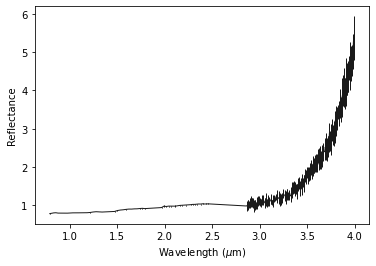

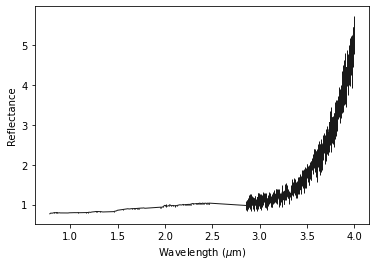

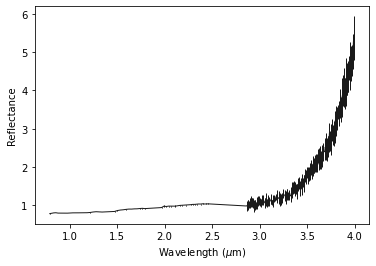

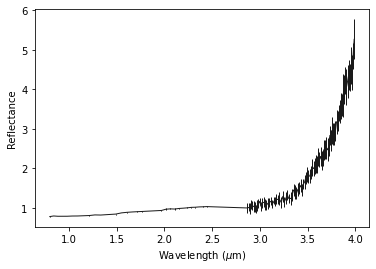

In [6]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import cana
from cana.datasets import getspectrum
import numpy as np
import plotly.express as px

df = px.data.tips()

spec = cana.loadspec('/home/camila/Desktop/TCC/GitHub/README.rst/svea-spec-dados.py')

spec = spec.mask_region(region=[2.55,2.85])

spec = spec.trim(0.7,4.0) 

spec = spec.clean_spec()

aux = np.where(spec.w < 2.555)[0] 
spec_ir1 = spec[aux] 

spec_ir1 = spec.trim(0.78,2.48) 
spec_ir1 = spec_ir1.mask_region(region=[[0.92,0.97],[1.11,1.17],[1.35,1.45],[1.80,1.95]]) 

aux = np.where(spec.w > 2.555)[0] 
spec_ir2 = spec[aux] 

spec_ir2 = spec.trim(2.84,4.0)

specnew = cana.stack_spec([spec_ir1, spec_ir2])

aux = np.where(specnew.w < 2.555)[0] 
spec1 = specnew[aux] 

aux = np.where(specnew.w > 2.555)[0] 
spec2 = specnew[aux] 

spec1_rebin =spec1.rebin()
spec1_5bin_rebin = spec1.rebin(5)
spec1_11bin_rebin = spec1.rebin(11)
spec1_21bin_rebin = spec1.rebin(21)

spec2_rebin = spec2.rebin()
spec2_5bin_rebin = spec2.rebin(5)
spec2_11bin_rebin = spec2.rebin(11)
spec2_21bin_rebin = spec2.rebin(21)

specnovo = cana.stack_spec([spec1_rebin, spec2_rebin])
specnovo5 = cana.stack_spec([spec1_5bin_rebin, spec2_5bin_rebin])
specnovo11 = cana.stack_spec([spec1_11bin_rebin, spec2_11bin_rebin])
specnovo21 = cana.stack_spec([spec1_21bin_rebin, spec2_21bin_rebin])


'''
specnovo = cana.stack_spec([spec1, spec2_rebin])
specnovo5 = cana.stack_spec([spec1, spec2_5bin_rebin])
specnovo11 = cana.stack_spec([spec1, spec2_11bin_rebin])
specnovo21 = cana.stack_spec([spec1, spec2_21bin_rebin])
'''


specnovo_clean = specnovo.clean_spec()
specnovo5_clean = specnovo5.clean_spec()
specnovo11_clean = specnovo11.clean_spec()
specnovo21_clean = specnovo21.clean_spec()

specnovo_clean.plot()
specnovo5_clean.plot()
specnovo11_clean.plot()
specnovo21_clean.plot()



In [7]:
#specnovo_clean.shape #para ver quantos pontos tem no gŕafico 

<Figure size 1440x864 with 0 Axes>

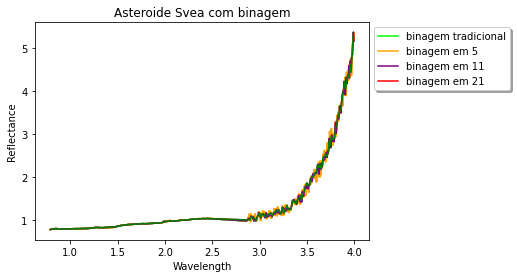

<Figure size 1440x864 with 0 Axes>

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np


matplotlib.pyplot.title("Asteroide Svea com binagem")

matplotlib.pyplot.xlabel("Wavelength")
matplotlib.pyplot.ylabel("Reflectance")

plt.plot(specnovo_clean.w, specnovo_clean.r,"lime",lw=1.5,linestyle="solid")
plt.plot(specnovo5_clean.w, specnovo5_clean.r,"orange",lw=1.5,linestyle="solid")
plt.plot(specnovo11_clean.w, specnovo11_clean.r,"purple",lw=1.5,linestyle="solid")
plt.plot(specnovo21_clean.w, specnovo21_clean.r,"red", lw=1.5,linestyle="solid") #legenda

plt.legend(["binagem tradicional", "binagem em 5", "binagem em 11", "binagem em 21"], 
           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)


plt.plot(specnovo_clean.w, specnovo_clean.r,"lime",lw=1.5,linestyle="solid")
plt.plot(specnovo5_clean.w, specnovo5_clean.r,"orange",lw=1.5,linestyle="solid")
plt.plot(specnovo11_clean.w, specnovo11_clean.r,"purple",lw=1.5,linestyle="solid")
plt.plot(specnovo21_clean.w, specnovo21_clean.r,"green",lw=1.5,linestyle="solid")


plt.figure(figsize=(20, 12))